## Machine learning

#### Import librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

#### récupération données

In [2]:
data = pd.read_csv("total_data.csv")
hopital = pd.read_csv("Nbpatients.csv")

#### Visualisation données

In [3]:
data.head()

,Unnamed: 0,date,no2_moy,pm10_moy,pm25_moy,temp_moy,pluie_moy,humid_moy,press_moy,vent_moy,nb_patient
0,0,2017-09-18,"47,00","14,51","3,2",10.758333,0.216667,85.083333,1017.754167,8.791667,22
1,1,2017-09-19,"38,63","13,15",8,12.075000,0.050000,79.125000,1021.441667,9.041667,25
2,2,2017-09-20,"43,92","16,84","7,2",11.720833,0.000000,78.458333,1022.545833,6.000000,30
3,3,2017-09-21,"45,54","19,25","10,1",13.704167,0.008333,71.916667,1019.054167,4.791667,12
4,4,2017-09-22,"47,92","18,14","6,7",14.216667,0.008333,76.375000,1021.754167,7.375000,22


In [4]:
hopital.head()

,Unnamed: 0,DATE_ENTREE,AGE,NIV_GRAV,DUREE_SEJOUR,Nb_patients
0,0,2015-01-01,54.128596,2.625000,6.868750,16
1,1,2015-01-02,44.444879,2.666667,11.676984,21
2,2,2015-01-03,46.301494,3.380952,8.826515,22
3,3,2015-01-04,58.431703,2.761905,10.519841,21
4,4,2015-01-05,57.463242,2.500000,7.659722,12


#### Traitement données

In [5]:
for elem in hopital.DUREE_SEJOUR:
    if elem < 0 : 
        elem = 1

In [6]:
data_tot = pd.DataFrame()

data_tot = data
data_tot["AGE"] = hopital["AGE"]
data_tot["NIV_GRAV"] = hopital["NIV_GRAV"]
data_tot["DUREE_SEJOUR"] = hopital["DUREE_SEJOUR"]

In [7]:
print(data_tot.head)


<bound method NDFrame.head of      Unnamed: 0        date no2_moy pm10_moy pm25_moy   temp_moy  pluie_moy  \
0             0  2017-09-18   47,00    14,51      3,2  10.758333   0.216667   
1             1  2017-09-19   38,63    13,15        8  12.075000   0.050000   
2             2  2017-09-20   43,92    16,84      7,2  11.720833   0.000000   
3             3  2017-09-21   45,54    19,25     10,1  13.704167   0.008333   
4             4  2017-09-22   47,92    18,14      6,7  14.216667   0.008333   
..          ...         ...     ...      ...      ...        ...        ...   
788         788  2019-12-27   38,39    20,07      2,1   9.462500   0.200000   
789         789  2019-12-28   25,87    21,65      3,1   6.658333   0.000000   
790         790  2019-12-29   21,44    10,98      1,8   2.087500   0.000000   
791         791  2019-12-30   32,74    16,72        0   1.908333   0.000000   
792         792  2019-12-31   44,85    19,76        0   0.687500   0.000000   

     humid_moy    pre

In [8]:
del data_tot["Unnamed: 0"]
data_tot

,date,no2_moy,pm10_moy,pm25_moy,temp_moy,pluie_moy,humid_moy,press_moy,vent_moy,nb_patient,AGE,NIV_GRAV,DUREE_SEJOUR
0,2017-09-18,"47,00","14,51","3,2",10.758333,0.216667,85.083333,1017.754167,8.791667,22,54.128596,2.625000,6.868750
1,2017-09-19,"38,63","13,15",8,12.075000,0.050000,79.125000,1021.441667,9.041667,25,44.444879,2.666667,11.676984
2,2017-09-20,"43,92","16,84","7,2",11.720833,0.000000,78.458333,1022.545833,6.000000,30,46.301494,3.380952,8.826515
3,2017-09-21,"45,54","19,25","10,1",13.704167,0.008333,71.916667,1019.054167,4.791667,12,58.431703,2.761905,10.519841
4,2017-09-22,"47,92","18,14","6,7",14.216667,0.008333,76.375000,1021.754167,7.375000,22,57.463242,2.500000,7.659722
...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,2019-12-27,"38,39","20,07","2,1",9.462500,0.200000,84.458333,1028.125000,15.500000,28,66.372740,2.526316,12.603333
789,2019-12-28,"25,87","21,65","3,1",6.658333,0.000000,81.708333,1037.504167,9.125000,26,60.430466,2.583333,12.047333
790,2019-12-29,"21,44","10,98","1,8",2.087500,0.000000,85.625000,1036.408333,5.791667,17,59.002087,2.952381,8.640476
791,2019-12-30,"32,74","16,72",0,1.908333,0.000000,85.375000,1033.337500,3.625000,21,66.216796,2.565217,9.534783


#### Conversion format données 

In [9]:
liste = []

for elem in data_tot["no2_moy"]:
    if type(elem) != float:
        liste.append(float(elem.replace(",",".")))
data_tot["no2_moy"] = liste

liste2 = []
f = 19/4

for elem in data_tot["pm10_moy"]:
    if elem == '019/04':
        elem = f
    if type(elem) != float:
        elem = (float(elem.replace(",",".")))
    liste2.append(elem)
data_tot["pm10_moy"] = liste2

liste3 = []

for elem in data_tot["pm25_moy"]:
    if type(elem) != float:
        liste3.append(float(elem.replace(",",".")))
data_tot["pm25_moy"] = liste3

In [10]:
mean_nbp = statistics.mean(data_tot.nb_patient)
mean_age = statistics.mean(data_tot.AGE)
mean_grv = statistics.mean(data_tot.NIV_GRAV)
mean_sej = statistics.mean(data_tot.DUREE_SEJOUR)

#### Graphique données

#### Corélation targets

In [11]:
corr = data_tot.corr()

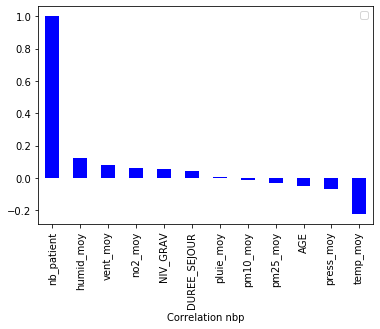

In [12]:
corr_nbp = corr.nb_patient.sort_values(ascending=False)
corr_nbp.plot(kind='bar', color='blue')
plt.xlabel('Correlation nbp')
plt.ylabel('')
plt.xticks(rotation=90)
plt.legend([])
plt.show()

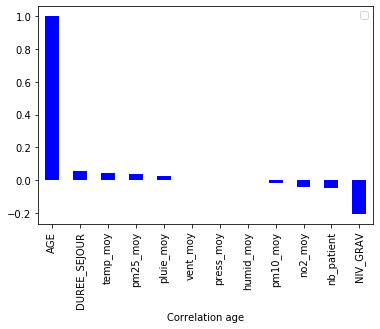

In [13]:
corr_age = corr.AGE.sort_values(ascending=False)
corr_age.plot(kind='bar', color='blue')
plt.xlabel('Correlation age')
plt.ylabel('')
plt.xticks(rotation=90)
plt.legend([])
plt.show()

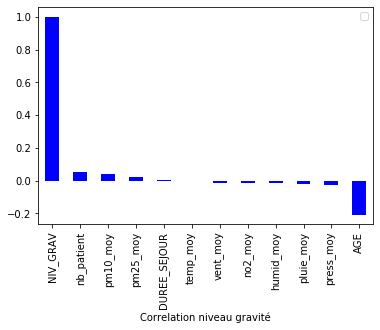

In [14]:
corr_grv = corr.NIV_GRAV.sort_values(ascending=False)
corr_grv.plot(kind='bar', color='blue')
plt.xlabel('Correlation niveau gravité')
plt.ylabel('')
plt.xticks(rotation=90)
plt.legend([])
plt.show()

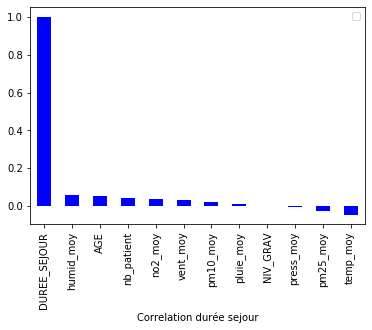

In [15]:
corr_sej = corr.DUREE_SEJOUR.sort_values(ascending=False)
corr_sej.plot(kind='bar', color='blue')
plt.xlabel('Correlation durée sejour')
plt.ylabel('')
plt.xticks(rotation=90)
plt.legend([])
plt.show()

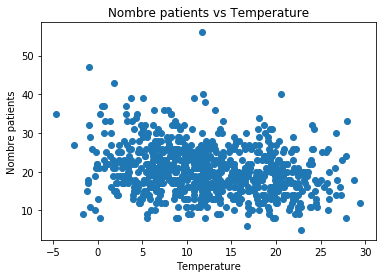

In [16]:
plt.scatter(x=data_tot["temp_moy"], y=data_tot["nb_patient"])
plt.xlabel('Temperature')
plt.ylabel('Nombre patients')
plt.title("Nombre patients vs Temperature")
plt.show()

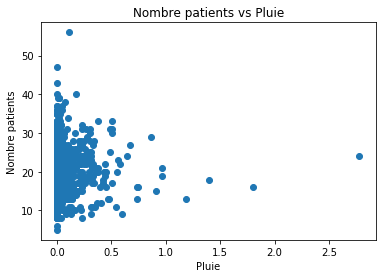

In [17]:
plt.scatter(x=data_tot["pluie_moy"], y=data_tot["nb_patient"])
plt.xlabel('Pluie')
plt.ylabel('Nombre patients')
plt.title("Nombre patients vs Pluie")
plt.show()

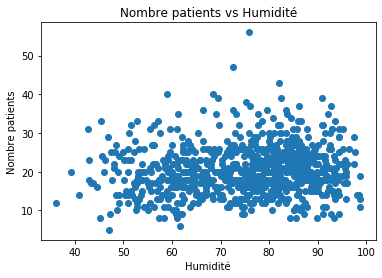

In [18]:
plt.scatter(x=data_tot["humid_moy"], y=data_tot["nb_patient"])
plt.xlabel('Humidité')
plt.ylabel('Nombre patients')
plt.title("Nombre patients vs Humidité")
plt.show()

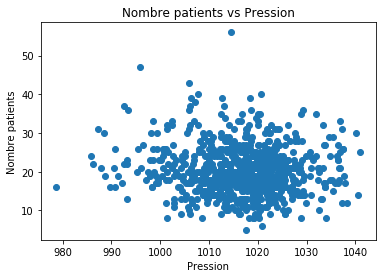

In [19]:
plt.scatter(x=data_tot["press_moy"], y=data_tot["nb_patient"])
plt.xlabel('Pression')
plt.ylabel('Nombre patients')
plt.title("Nombre patients vs Pression")
plt.show()

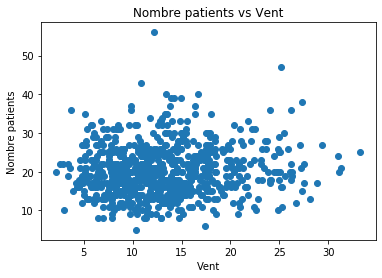

In [20]:
plt.scatter(x=data_tot["vent_moy"], y=data_tot["nb_patient"])
plt.xlabel('Vent')
plt.ylabel('Nombre patients')
plt.title("Nombre patients vs Vent")
plt.show()

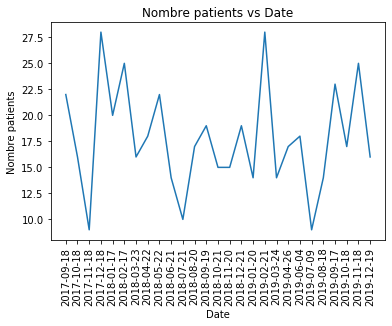

In [21]:
x=data_tot["date"][::30]
y=data_tot["nb_patient"][::30]
plt.plot(x, y)
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Nombre patients')
plt.title("Nombre patients vs Date")
plt.show()

#### création d'un dataframe pour chaque modèle

In [22]:
df1_nbp = pd.DataFrame(columns = ['no2_moy_J-1' , 'no2_moy_J-2', 'no2_moy_J-3','pm10_moy_J-1' , 'pm10_moy_J-2', 'pm10_moy_J-3','pm25_moy_J-1','pm25_moy_J-2','pm25_moy_J-3','temp_moy_J-1','temp_moy_J-2','temp_moy_J-3','pluie_moy_J-1','pluie_moy_J-2','pluie_moy_J-3','humid_moy_J-1','humid_moy_J-2','humid_moy_J-3','press_moy_J-1','press_moy_J-2','press_moy_J-3','vent_moy_J-1','vent_moy_J-2','vent_moy_J-3','nb_patients_J-0'])
df2_nbp = pd.DataFrame(columns = ['no2_moy_J-1' , 'no2_moy_J-2', 'no2_moy_J-3','pm10_moy_J-1' , 'pm10_moy_J-2', 'pm10_moy_J-3','pm25_moy_J-1','pm25_moy_J-2','pm25_moy_J-3','temp_moy_J-1','temp_moy_J-2','temp_moy_J-3','pluie_moy_J-1','pluie_moy_J-2','pluie_moy_J-3','humid_moy_J-1','humid_moy_J-2','humid_moy_J-3','press_moy_J-1','press_moy_J-2','press_moy_J-3','vent_moy_J-1','vent_moy_J-2','vent_moy_J-3','nb_patients_J+1'])
df3_nbp = pd.DataFrame(columns = ['no2_moy_J-1' , 'no2_moy_J-2', 'no2_moy_J-3','pm10_moy_J-1' , 'pm10_moy_J-2', 'pm10_moy_J-3','pm25_moy_J-1','pm25_moy_J-2','pm25_moy_J-3','temp_moy_J-1','temp_moy_J-2','temp_moy_J-3','pluie_moy_J-1','pluie_moy_J-2','pluie_moy_J-3','humid_moy_J-1','humid_moy_J-2','humid_moy_J-3','press_moy_J-1','press_moy_J-2','press_moy_J-3','vent_moy_J-1','vent_moy_J-2','vent_moy_J-3','nb_patients_J+2'])

df1_age = pd.DataFrame(columns = ['no2_moy_J-1' , 'no2_moy_J-2', 'no2_moy_J-3','pm10_moy_J-1' , 'pm10_moy_J-2', 'pm10_moy_J-3','pm25_moy_J-1','pm25_moy_J-2','pm25_moy_J-3','temp_moy_J-1','temp_moy_J-2','temp_moy_J-3','pluie_moy_J-1','pluie_moy_J-2','pluie_moy_J-3','humid_moy_J-1','humid_moy_J-2','humid_moy_J-3','press_moy_J-1','press_moy_J-2','press_moy_J-3','vent_moy_J-1','vent_moy_J-2','vent_moy_J-3','AGE_J-0'])
df2_age = pd.DataFrame(columns = ['no2_moy_J-1' , 'no2_moy_J-2', 'no2_moy_J-3','pm10_moy_J-1' , 'pm10_moy_J-2', 'pm10_moy_J-3','pm25_moy_J-1','pm25_moy_J-2','pm25_moy_J-3','temp_moy_J-1','temp_moy_J-2','temp_moy_J-3','pluie_moy_J-1','pluie_moy_J-2','pluie_moy_J-3','humid_moy_J-1','humid_moy_J-2','humid_moy_J-3','press_moy_J-1','press_moy_J-2','press_moy_J-3','vent_moy_J-1','vent_moy_J-2','vent_moy_J-3','AGE_J+1'])
df3_age = pd.DataFrame(columns = ['no2_moy_J-1' , 'no2_moy_J-2', 'no2_moy_J-3','pm10_moy_J-1' , 'pm10_moy_J-2', 'pm10_moy_J-3','pm25_moy_J-1','pm25_moy_J-2','pm25_moy_J-3','temp_moy_J-1','temp_moy_J-2','temp_moy_J-3','pluie_moy_J-1','pluie_moy_J-2','pluie_moy_J-3','humid_moy_J-1','humid_moy_J-2','humid_moy_J-3','press_moy_J-1','press_moy_J-2','press_moy_J-3','vent_moy_J-1','vent_moy_J-2','vent_moy_J-3','AGE_J+2'])

df1_grv = pd.DataFrame(columns = ['no2_moy_J-1' , 'no2_moy_J-2', 'no2_moy_J-3','pm10_moy_J-1' , 'pm10_moy_J-2', 'pm10_moy_J-3','pm25_moy_J-1','pm25_moy_J-2','pm25_moy_J-3','temp_moy_J-1','temp_moy_J-2','temp_moy_J-3','pluie_moy_J-1','pluie_moy_J-2','pluie_moy_J-3','humid_moy_J-1','humid_moy_J-2','humid_moy_J-3','press_moy_J-1','press_moy_J-2','press_moy_J-3','vent_moy_J-1','vent_moy_J-2','vent_moy_J-3','GRV_J-0'])
df2_grv = pd.DataFrame(columns = ['no2_moy_J-1' , 'no2_moy_J-2', 'no2_moy_J-3','pm10_moy_J-1' , 'pm10_moy_J-2', 'pm10_moy_J-3','pm25_moy_J-1','pm25_moy_J-2','pm25_moy_J-3','temp_moy_J-1','temp_moy_J-2','temp_moy_J-3','pluie_moy_J-1','pluie_moy_J-2','pluie_moy_J-3','humid_moy_J-1','humid_moy_J-2','humid_moy_J-3','press_moy_J-1','press_moy_J-2','press_moy_J-3','vent_moy_J-1','vent_moy_J-2','vent_moy_J-3','GRV_J+1'])
df3_grv = pd.DataFrame(columns = ['no2_moy_J-1' , 'no2_moy_J-2', 'no2_moy_J-3','pm10_moy_J-1' , 'pm10_moy_J-2', 'pm10_moy_J-3','pm25_moy_J-1','pm25_moy_J-2','pm25_moy_J-3','temp_moy_J-1','temp_moy_J-2','temp_moy_J-3','pluie_moy_J-1','pluie_moy_J-2','pluie_moy_J-3','humid_moy_J-1','humid_moy_J-2','humid_moy_J-3','press_moy_J-1','press_moy_J-2','press_moy_J-3','vent_moy_J-1','vent_moy_J-2','vent_moy_J-3','GRV_J+2'])

df1_sej = pd.DataFrame(columns = ['no2_moy_J-1' , 'no2_moy_J-2', 'no2_moy_J-3','pm10_moy_J-1' , 'pm10_moy_J-2', 'pm10_moy_J-3','pm25_moy_J-1','pm25_moy_J-2','pm25_moy_J-3','temp_moy_J-1','temp_moy_J-2','temp_moy_J-3','pluie_moy_J-1','pluie_moy_J-2','pluie_moy_J-3','humid_moy_J-1','humid_moy_J-2','humid_moy_J-3','press_moy_J-1','press_moy_J-2','press_moy_J-3','vent_moy_J-1','vent_moy_J-2','vent_moy_J-3','SEJ_J-0'])
df2_sej = pd.DataFrame(columns = ['no2_moy_J-1' , 'no2_moy_J-2', 'no2_moy_J-3','pm10_moy_J-1' , 'pm10_moy_J-2', 'pm10_moy_J-3','pm25_moy_J-1','pm25_moy_J-2','pm25_moy_J-3','temp_moy_J-1','temp_moy_J-2','temp_moy_J-3','pluie_moy_J-1','pluie_moy_J-2','pluie_moy_J-3','humid_moy_J-1','humid_moy_J-2','humid_moy_J-3','press_moy_J-1','press_moy_J-2','press_moy_J-3','vent_moy_J-1','vent_moy_J-2','vent_moy_J-3','SEJ_J+1'])
df3_sej = pd.DataFrame(columns = ['no2_moy_J-1' , 'no2_moy_J-2', 'no2_moy_J-3','pm10_moy_J-1' , 'pm10_moy_J-2', 'pm10_moy_J-3','pm25_moy_J-1','pm25_moy_J-2','pm25_moy_J-3','temp_moy_J-1','temp_moy_J-2','temp_moy_J-3','pluie_moy_J-1','pluie_moy_J-2','pluie_moy_J-3','humid_moy_J-1','humid_moy_J-2','humid_moy_J-3','press_moy_J-1','press_moy_J-2','press_moy_J-3','vent_moy_J-1','vent_moy_J-2','vent_moy_J-3','SEJ_J+2'])



In [23]:
df1_nbp

,no2_moy_J-1,no2_moy_J-2,no2_moy_J-3,pm10_moy_J-1,pm10_moy_J-2,pm10_moy_J-3,pm25_moy_J-1,pm25_moy_J-2,pm25_moy_J-3,temp_moy_J-1,...,humid_moy_J-1,humid_moy_J-2,humid_moy_J-3,press_moy_J-1,press_moy_J-2,press_moy_J-3,vent_moy_J-1,vent_moy_J-2,vent_moy_J-3,nb_patients_J-0


#### Remplissage des dataframe avec des valeurs adéquats

In [24]:
for i in range (len(data_tot)-4) :
    df1_nbp.loc[i]=[data_tot.no2_moy[i+2], data_tot.no2_moy[i+1], data_tot.no2_moy[i], data_tot.pm10_moy[i+2],data_tot.pm10_moy[i+1],data_tot.pm10_moy[i],data_tot.pm25_moy[i+2],data_tot.pm25_moy[i+1],data_tot.pm25_moy[i],data_tot.temp_moy[i+2],data_tot.temp_moy[i+1],data_tot.temp_moy[i],data_tot.pluie_moy[i+2],data_tot.pluie_moy[i+1],data_tot.pluie_moy[i],data_tot.humid_moy[i+2],data_tot.humid_moy[i+1],data_tot.humid_moy[i],data_tot.press_moy[i+2],data_tot.press_moy[i+1],data_tot.press_moy[i],data_tot.vent_moy[i+2],data_tot.vent_moy[i+1],data_tot.vent_moy[i],data_tot.nb_patient[i+4]]
for i in range (len(data_tot)-5) :
    df2_nbp.loc[i]=[data_tot.no2_moy[i+2], data_tot.no2_moy[i+1], data_tot.no2_moy[i], data_tot.pm10_moy[i+2],data_tot.pm10_moy[i+1],data_tot.pm10_moy[i],data_tot.pm25_moy[i+2],data_tot.pm25_moy[i+1],data_tot.pm25_moy[i],data_tot.temp_moy[i+2],data_tot.temp_moy[i+1],data_tot.temp_moy[i],data_tot.pluie_moy[i+2],data_tot.pluie_moy[i+1],data_tot.pluie_moy[i],data_tot.humid_moy[i+2],data_tot.humid_moy[i+1],data_tot.humid_moy[i],data_tot.press_moy[i+2],data_tot.press_moy[i+1],data_tot.press_moy[i],data_tot.vent_moy[i+2],data_tot.vent_moy[i+1],data_tot.vent_moy[i],data_tot.nb_patient[i+5]]
for i in range (len(data_tot)-6) :
    df3_nbp.loc[i]=[data_tot.no2_moy[i+2], data_tot.no2_moy[i+1], data_tot.no2_moy[i], data_tot.pm10_moy[i+2],data_tot.pm10_moy[i+1],data_tot.pm10_moy[i],data_tot.pm25_moy[i+2],data_tot.pm25_moy[i+1],data_tot.pm25_moy[i],data_tot.temp_moy[i+2],data_tot.temp_moy[i+1],data_tot.temp_moy[i],data_tot.pluie_moy[i+2],data_tot.pluie_moy[i+1],data_tot.pluie_moy[i],data_tot.humid_moy[i+2],data_tot.humid_moy[i+1],data_tot.humid_moy[i],data_tot.press_moy[i+2],data_tot.press_moy[i+1],data_tot.press_moy[i],data_tot.vent_moy[i+2],data_tot.vent_moy[i+1],data_tot.vent_moy[i],data_tot.nb_patient[i+6]]
   
for i in range (len(data_tot)-4) :
    df1_age.loc[i]=[data_tot.no2_moy[i+2], data_tot.no2_moy[i+1], data_tot.no2_moy[i], data_tot.pm10_moy[i+2],data_tot.pm10_moy[i+1],data_tot.pm10_moy[i],data_tot.pm25_moy[i+2],data_tot.pm25_moy[i+1],data_tot.pm25_moy[i],data_tot.temp_moy[i+2],data_tot.temp_moy[i+1],data_tot.temp_moy[i],data_tot.pluie_moy[i+2],data_tot.pluie_moy[i+1],data_tot.pluie_moy[i],data_tot.humid_moy[i+2],data_tot.humid_moy[i+1],data_tot.humid_moy[i],data_tot.press_moy[i+2],data_tot.press_moy[i+1],data_tot.press_moy[i],data_tot.vent_moy[i+2],data_tot.vent_moy[i+1],data_tot.vent_moy[i],data_tot.AGE[i+4]]
for i in range (len(data_tot)-5) :
    df2_age.loc[i]=[data_tot.no2_moy[i+2], data_tot.no2_moy[i+1], data_tot.no2_moy[i], data_tot.pm10_moy[i+2],data_tot.pm10_moy[i+1],data_tot.pm10_moy[i],data_tot.pm25_moy[i+2],data_tot.pm25_moy[i+1],data_tot.pm25_moy[i],data_tot.temp_moy[i+2],data_tot.temp_moy[i+1],data_tot.temp_moy[i],data_tot.pluie_moy[i+2],data_tot.pluie_moy[i+1],data_tot.pluie_moy[i],data_tot.humid_moy[i+2],data_tot.humid_moy[i+1],data_tot.humid_moy[i],data_tot.press_moy[i+2],data_tot.press_moy[i+1],data_tot.press_moy[i],data_tot.vent_moy[i+2],data_tot.vent_moy[i+1],data_tot.vent_moy[i],data_tot.AGE[i+5]]
for i in range (len(data_tot)-6) :
    df3_age.loc[i]=[data_tot.no2_moy[i+2], data_tot.no2_moy[i+1], data_tot.no2_moy[i], data_tot.pm10_moy[i+2],data_tot.pm10_moy[i+1],data_tot.pm10_moy[i],data_tot.pm25_moy[i+2],data_tot.pm25_moy[i+1],data_tot.pm25_moy[i],data_tot.temp_moy[i+2],data_tot.temp_moy[i+1],data_tot.temp_moy[i],data_tot.pluie_moy[i+2],data_tot.pluie_moy[i+1],data_tot.pluie_moy[i],data_tot.humid_moy[i+2],data_tot.humid_moy[i+1],data_tot.humid_moy[i],data_tot.press_moy[i+2],data_tot.press_moy[i+1],data_tot.press_moy[i],data_tot.vent_moy[i+2],data_tot.vent_moy[i+1],data_tot.vent_moy[i],data_tot.AGE[i+6]]
    
for i in range (len(data_tot)-4) :
    df1_grv.loc[i]=[data_tot.no2_moy[i+2], data_tot.no2_moy[i+1], data_tot.no2_moy[i], data_tot.pm10_moy[i+2],data_tot.pm10_moy[i+1],data_tot.pm10_moy[i],data_tot.pm25_moy[i+2],data_tot.pm25_moy[i+1],data_tot.pm25_moy[i],data_tot.temp_moy[i+2],data_tot.temp_moy[i+1],data_tot.temp_moy[i],data_tot.pluie_moy[i+2],data_tot.pluie_moy[i+1],data_tot.pluie_moy[i],data_tot.humid_moy[i+2],data_tot.humid_moy[i+1],data_tot.humid_moy[i],data_tot.press_moy[i+2],data_tot.press_moy[i+1],data_tot.press_moy[i],data_tot.vent_moy[i+2],data_tot.vent_moy[i+1],data_tot.vent_moy[i],data_tot.NIV_GRAV[i+4]]
for i in range (len(data_tot)-5) :
    df2_grv.loc[i]=[data_tot.no2_moy[i+2], data_tot.no2_moy[i+1], data_tot.no2_moy[i], data_tot.pm10_moy[i+2],data_tot.pm10_moy[i+1],data_tot.pm10_moy[i],data_tot.pm25_moy[i+2],data_tot.pm25_moy[i+1],data_tot.pm25_moy[i],data_tot.temp_moy[i+2],data_tot.temp_moy[i+1],data_tot.temp_moy[i],data_tot.pluie_moy[i+2],data_tot.pluie_moy[i+1],data_tot.pluie_moy[i],data_tot.humid_moy[i+2],data_tot.humid_moy[i+1],data_tot.humid_moy[i],data_tot.press_moy[i+2],data_tot.press_moy[i+1],data_tot.press_moy[i],data_tot.vent_moy[i+2],data_tot.vent_moy[i+1],data_tot.vent_moy[i],data_tot.NIV_GRAV[i+5]]
for i in range (len(data_tot)-6) :
    df3_grv.loc[i]=[data_tot.no2_moy[i+2], data_tot.no2_moy[i+1], data_tot.no2_moy[i], data_tot.pm10_moy[i+2],data_tot.pm10_moy[i+1],data_tot.pm10_moy[i],data_tot.pm25_moy[i+2],data_tot.pm25_moy[i+1],data_tot.pm25_moy[i],data_tot.temp_moy[i+2],data_tot.temp_moy[i+1],data_tot.temp_moy[i],data_tot.pluie_moy[i+2],data_tot.pluie_moy[i+1],data_tot.pluie_moy[i],data_tot.humid_moy[i+2],data_tot.humid_moy[i+1],data_tot.humid_moy[i],data_tot.press_moy[i+2],data_tot.press_moy[i+1],data_tot.press_moy[i],data_tot.vent_moy[i+2],data_tot.vent_moy[i+1],data_tot.vent_moy[i],data_tot.NIV_GRAV[i+6]]
    
for i in range (len(data_tot)-4) :
    df1_sej.loc[i]=[data_tot.no2_moy[i+2], data_tot.no2_moy[i+1], data_tot.no2_moy[i], data_tot.pm10_moy[i+2],data_tot.pm10_moy[i+1],data_tot.pm10_moy[i],data_tot.pm25_moy[i+2],data_tot.pm25_moy[i+1],data_tot.pm25_moy[i],data_tot.temp_moy[i+2],data_tot.temp_moy[i+1],data_tot.temp_moy[i],data_tot.pluie_moy[i+2],data_tot.pluie_moy[i+1],data_tot.pluie_moy[i],data_tot.humid_moy[i+2],data_tot.humid_moy[i+1],data_tot.humid_moy[i],data_tot.press_moy[i+2],data_tot.press_moy[i+1],data_tot.press_moy[i],data_tot.vent_moy[i+2],data_tot.vent_moy[i+1],data_tot.vent_moy[i],data_tot.DUREE_SEJOUR[i+4]]
for i in range (len(data_tot)-5) :
    df2_sej.loc[i]=[data_tot.no2_moy[i+2], data_tot.no2_moy[i+1], data_tot.no2_moy[i], data_tot.pm10_moy[i+2],data_tot.pm10_moy[i+1],data_tot.pm10_moy[i],data_tot.pm25_moy[i+2],data_tot.pm25_moy[i+1],data_tot.pm25_moy[i],data_tot.temp_moy[i+2],data_tot.temp_moy[i+1],data_tot.temp_moy[i],data_tot.pluie_moy[i+2],data_tot.pluie_moy[i+1],data_tot.pluie_moy[i],data_tot.humid_moy[i+2],data_tot.humid_moy[i+1],data_tot.humid_moy[i],data_tot.press_moy[i+2],data_tot.press_moy[i+1],data_tot.press_moy[i],data_tot.vent_moy[i+2],data_tot.vent_moy[i+1],data_tot.vent_moy[i],data_tot.DUREE_SEJOUR[i+5]]
for i in range (len(data_tot)-6) :
    df3_sej.loc[i]=[data_tot.no2_moy[i+2], data_tot.no2_moy[i+1], data_tot.no2_moy[i], data_tot.pm10_moy[i+2],data_tot.pm10_moy[i+1],data_tot.pm10_moy[i],data_tot.pm25_moy[i+2],data_tot.pm25_moy[i+1],data_tot.pm25_moy[i],data_tot.temp_moy[i+2],data_tot.temp_moy[i+1],data_tot.temp_moy[i],data_tot.pluie_moy[i+2],data_tot.pluie_moy[i+1],data_tot.pluie_moy[i],data_tot.humid_moy[i+2],data_tot.humid_moy[i+1],data_tot.humid_moy[i],data_tot.press_moy[i+2],data_tot.press_moy[i+1],data_tot.press_moy[i],data_tot.vent_moy[i+2],data_tot.vent_moy[i+1],data_tot.vent_moy[i],data_tot.DUREE_SEJOUR[i+6]]

#### Gestion des "NaN"

In [25]:
df1_nbp = df1_nbp.fillna(method='ffill')
df2_nbp = df2_nbp.fillna(method='ffill')
df3_nbp = df3_nbp.fillna(method='ffill')

df1_age = df1_age.fillna(method='ffill')
df2_age = df2_age.fillna(method='ffill')
df3_age = df3_age.fillna(method='ffill')

df1_grv = df1_grv.fillna(method='ffill')
df2_grv = df2_grv.fillna(method='ffill')
df3_grv = df3_grv.fillna(method='ffill')

df1_sej = df1_sej.fillna(method='ffill')
df2_sej = df2_sej.fillna(method='ffill')
df3_sej = df3_sej.fillna(method='ffill')

#### récupération des features/target pour chaque modèle

In [26]:
X1_nbp = df1_nbp.drop(columns='nb_patients_J-0') 
y1_nbp = df1_nbp["nb_patients_J-0"]

X2_nbp = df2_nbp.drop(columns='nb_patients_J+1') 
y2_nbp = df2_nbp["nb_patients_J+1"]

X3_nbp = df3_nbp.drop(columns='nb_patients_J+2') 
y3_nbp = df3_nbp["nb_patients_J+2"]

################################################

X1_age = df1_age.drop(columns='AGE_J-0') 
y1_age = df1_age["AGE_J-0"]

X2_age = df2_age.drop(columns='AGE_J+1') 
y2_age = df2_age["AGE_J+1"]

X3_age = df3_age.drop(columns='AGE_J+2') 
y3_age = df3_age["AGE_J+2"]

################################################

X1_grv = df1_grv.drop(columns='GRV_J-0') 
y1_grv = df1_grv["GRV_J-0"]

X2_grv = df2_grv.drop(columns='GRV_J+1') 
y2_grv = df2_grv["GRV_J+1"]

X3_grv = df3_grv.drop(columns='GRV_J+2') 
y3_grv = df3_grv["GRV_J+2"]

################################################

X1_sej = df1_sej.drop(columns='SEJ_J-0') 
y1_sej = df1_sej["SEJ_J-0"]

X2_sej = df2_sej.drop(columns='SEJ_J+1') 
y2_sej = df2_sej["SEJ_J+1"]

X3_sej = df3_sej.drop(columns='SEJ_J+2') 
y3_sej = df3_sej["SEJ_J+2"]

#### Séparation des données pour chaque dataframe

In [27]:
# Import train_test_split
from sklearn.model_selection import train_test_split 

# Split data into 80% train and 20% test
X_train1_nbp, X_test1_nbp, y_train1_nbp, y_test1_nbp = train_test_split(X1_nbp, y1_nbp,test_size=0.2, random_state=3)
X_train2_nbp, X_test2_nbp, y_train2_nbp, y_test2_nbp = train_test_split(X2_nbp, y2_nbp,test_size=0.2, random_state=3)
X_train3_nbp, X_test3_nbp, y_train3_nbp, y_test3_nbp = train_test_split(X3_nbp, y3_nbp,test_size=0.2, random_state=3)

X_train1_age, X_test1_age, y_train1_age, y_test1_age = train_test_split(X1_age, y1_age,test_size=0.2, random_state=3)
X_train2_age, X_test2_age, y_train2_age, y_test2_age = train_test_split(X2_age, y2_age,test_size=0.2, random_state=3)
X_train3_age, X_test3_age, y_train3_age, y_test3_age = train_test_split(X3_age, y3_age,test_size=0.2, random_state=3)

X_train1_grv, X_test1_grv, y_train1_grv, y_test1_grv = train_test_split(X1_grv, y1_grv,test_size=0.2, random_state=3)
X_train2_grv, X_test2_grv, y_train2_grv, y_test2_grv = train_test_split(X2_grv, y2_grv,test_size=0.2, random_state=3)
X_train3_grv, X_test3_grv, y_train3_grv, y_test3_grv = train_test_split(X3_grv, y3_grv,test_size=0.2, random_state=3)

X_train1_sej, X_test1_sej, y_train1_sej, y_test1_sej = train_test_split(X1_sej, y1_sej,test_size=0.2, random_state=3)
X_train2_sej, X_test2_sej, y_train2_sej, y_test2_sej = train_test_split(X2_sej, y2_sej,test_size=0.2, random_state=3)
X_train3_sej, X_test3_sej, y_train3_sej, y_test3_sej = train_test_split(X3_sej, y3_sej,test_size=0.2, random_state=3)

#### DecisionTreeRegressor

In [28]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor 

# Instantiate a DecisionTreeRegressor 'dt' 
dt1_nbp = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1, random_state=3)
dt2_nbp = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1, random_state=3)
dt3_nbp = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1, random_state=3)

dt1_age = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1, random_state=3)
dt2_age = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1, random_state=3)
dt3_age = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1, random_state=3)

dt1_grv = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1, random_state=3)
dt2_grv = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1, random_state=3)
dt3_grv = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1, random_state=3)

dt1_sej = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1, random_state=3)
dt2_sej = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1, random_state=3)
dt3_sej = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1, random_state=3)

#### Linear modèle : Linear Regression

In [29]:
# Import Linear Model
from sklearn import linear_model

# Instantiate a Linear Regression 'lr' 
lr1_nbp = linear_model.LinearRegression()
lr2_nbp = linear_model.LinearRegression()
lr3_nbp = linear_model.LinearRegression()

lr1_age = linear_model.LinearRegression()
lr2_age = linear_model.LinearRegression()
lr3_age = linear_model.LinearRegression()

lr1_grv = linear_model.LinearRegression()
lr2_grv = linear_model.LinearRegression()
lr3_grv = linear_model.LinearRegression()

lr1_sej = linear_model.LinearRegression()
lr2_sej = linear_model.LinearRegression()
lr3_sej = linear_model.LinearRegression()

#### Linear modèle : Lasso

In [30]:
# Instantiate a Lasso 'la' 
la1_nbp = linear_model.Lasso(tol=2)
la2_nbp = linear_model.Lasso(tol=2)
la3_nbp = linear_model.Lasso(tol=2)

la1_age = linear_model.Lasso(tol=2)
la2_age = linear_model.Lasso(tol=2)
la3_age = linear_model.Lasso(tol=2)

la1_grv = linear_model.Lasso(tol=2)
la2_grv = linear_model.Lasso(tol=2)
la3_grv = linear_model.Lasso(tol=2)

la1_sej = linear_model.Lasso(tol=2)
la2_sej = linear_model.Lasso(tol=2)
la3_sej = linear_model.Lasso(tol=2)

#### Linear modèle : ElasticNet

In [31]:
# Instantiate a ElasticNet 'en' 
en1_nbp = linear_model.ElasticNet(l1_ratio=0.8,tol=2)
en2_nbp = linear_model.ElasticNet(l1_ratio=0.8,tol=2)
en3_nbp = linear_model.ElasticNet(l1_ratio=0.8,tol=2)

en1_age = linear_model.ElasticNet(l1_ratio=0.8,tol=2)
en2_age = linear_model.ElasticNet(l1_ratio=0.8,tol=2)
en3_age = linear_model.ElasticNet(l1_ratio=0.8,tol=2)

en1_grv = linear_model.ElasticNet(l1_ratio=0.8,tol=2)
en2_grv = linear_model.ElasticNet(l1_ratio=0.8,tol=2)
en3_grv = linear_model.ElasticNet(l1_ratio=0.8,tol=2)

en1_sej = linear_model.ElasticNet(l1_ratio=0.8,tol=2)
en2_sej = linear_model.ElasticNet(l1_ratio=0.8,tol=2)
en3_sej = linear_model.ElasticNet(l1_ratio=0.8,tol=2)

#### Linear modèle : ARDRegression

In [32]:
# Instantiate a ARDRegression 'ardr' 
ardr1_nbp = linear_model.ARDRegression(lambda_1=0.5)
ardr2_nbp = linear_model.ARDRegression(lambda_1=0.5)
ardr3_nbp = linear_model.ARDRegression(lambda_1=0.5)

ardr1_age = linear_model.ARDRegression(lambda_1=0.5)
ardr2_age = linear_model.ARDRegression(lambda_1=0.5)
ardr3_age = linear_model.ARDRegression(lambda_1=0.5)

ardr1_grv = linear_model.ARDRegression(lambda_1=0.5)
ardr2_grv = linear_model.ARDRegression(lambda_1=0.5)
ardr3_grv = linear_model.ARDRegression(lambda_1=0.5)

ardr1_sej = linear_model.ARDRegression(lambda_1=0.5)
ardr2_sej = linear_model.ARDRegression(lambda_1=0.5)
ardr3_sej = linear_model.ARDRegression(lambda_1=0.5)

#### Fit pour chaque modèle

In [33]:
# Fit 'dt' to the training-set 
dt1_nbp.fit(X_train1_nbp, y_train1_nbp)
dt2_nbp.fit(X_train2_nbp, y_train2_nbp)
dt3_nbp.fit(X_train3_nbp, y_train3_nbp)

dt1_age.fit(X_train1_age, y_train1_age)
dt2_age.fit(X_train2_age, y_train2_age)
dt3_age.fit(X_train3_age, y_train3_age)

dt1_grv.fit(X_train1_grv, y_train1_grv)
dt2_grv.fit(X_train2_grv, y_train2_grv)
dt3_grv.fit(X_train3_grv, y_train3_grv)

dt1_sej.fit(X_train1_sej, y_train1_sej)
dt2_sej.fit(X_train2_sej, y_train2_sej)
dt3_sej.fit(X_train3_sej, y_train3_sej)

# Fit 'lr' to the training-set 
lr1_nbp.fit(X_train1_nbp, y_train1_nbp)
lr2_nbp.fit(X_train2_nbp, y_train2_nbp)
lr3_nbp.fit(X_train3_nbp, y_train3_nbp)

lr1_age.fit(X_train1_age, y_train1_age)
lr2_age.fit(X_train2_age, y_train2_age)
lr3_age.fit(X_train3_age, y_train3_age)

lr1_grv.fit(X_train1_grv, y_train1_grv)
lr2_grv.fit(X_train2_grv, y_train2_grv)
lr3_grv.fit(X_train3_grv, y_train3_grv)

lr1_sej.fit(X_train1_sej, y_train1_sej)
lr2_sej.fit(X_train2_sej, y_train2_sej)
lr3_sej.fit(X_train3_sej, y_train3_sej)

# Fit 'la' to the training-set 
la1_nbp.fit(X_train1_nbp, y_train1_nbp)
la2_nbp.fit(X_train2_nbp, y_train2_nbp)
la3_nbp.fit(X_train3_nbp, y_train3_nbp)

la1_age.fit(X_train1_age, y_train1_age)
la2_age.fit(X_train2_age, y_train2_age)
la3_age.fit(X_train3_age, y_train3_age)

la1_grv.fit(X_train1_grv, y_train1_grv)
la2_grv.fit(X_train2_grv, y_train2_grv)
la3_grv.fit(X_train3_grv, y_train3_grv)

la1_sej.fit(X_train1_sej, y_train1_sej)
la2_sej.fit(X_train2_sej, y_train2_sej)
la3_sej.fit(X_train3_sej, y_train3_sej)

# Fit 'en' to the training-set 
en1_nbp.fit(X_train1_nbp, y_train1_nbp)
en2_nbp.fit(X_train2_nbp, y_train2_nbp)
en3_nbp.fit(X_train3_nbp, y_train3_nbp)

en1_age.fit(X_train1_age, y_train1_age)
en2_age.fit(X_train2_age, y_train2_age)
en3_age.fit(X_train3_age, y_train3_age)

en1_grv.fit(X_train1_grv, y_train1_grv)
en2_grv.fit(X_train2_grv, y_train2_grv)
en3_grv.fit(X_train3_grv, y_train3_grv)

en1_sej.fit(X_train1_sej, y_train1_sej)
en2_sej.fit(X_train2_sej, y_train2_sej)
en3_sej.fit(X_train3_sej, y_train3_sej)

# Fit 'ardr' to the training-set 
ardr1_nbp.fit(X_train1_nbp, y_train1_nbp)
ardr2_nbp.fit(X_train2_nbp, y_train2_nbp)
ardr3_nbp.fit(X_train3_nbp, y_train3_nbp)

ardr1_age.fit(X_train1_age, y_train1_age)
ardr2_age.fit(X_train2_age, y_train2_age)
ardr3_age.fit(X_train3_age, y_train3_age)

ardr1_grv.fit(X_train1_grv, y_train1_grv)
ardr2_grv.fit(X_train2_grv, y_train2_grv)
ardr3_grv.fit(X_train3_grv, y_train3_grv)

ardr1_sej.fit(X_train1_sej, y_train1_sej)
ardr2_sej.fit(X_train2_sej, y_train2_sej)
ardr3_sej.fit(X_train3_sej, y_train3_sej)

ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=0.5, lambda_2=1e-06, n_iter=300,
              normalize=False, threshold_lambda=10000.0, tol=0.001,
              verbose=False)

#### Predict pour chaque modèle

In [34]:
# Predict test-set labels 
#dt
y_pred1_dt_nbp = dt1_nbp.predict(X_test1_nbp)
y_pred2_dt_nbp = dt2_nbp.predict(X_test2_nbp)
y_pred3_dt_nbp = dt3_nbp.predict(X_test3_nbp)

y_pred1_dt_age = dt1_age.predict(X_test1_age)
y_pred2_dt_age = dt2_age.predict(X_test2_age)
y_pred3_dt_age = dt3_age.predict(X_test3_age)

y_pred1_dt_grv = dt1_grv.predict(X_test1_grv)
y_pred2_dt_grv = dt2_grv.predict(X_test2_grv)
y_pred3_dt_grv = dt3_grv.predict(X_test3_grv)

y_pred1_dt_sej = dt1_sej.predict(X_test1_sej)
y_pred2_dt_sej = dt2_sej.predict(X_test2_sej)
y_pred3_dt_sej = dt3_sej.predict(X_test3_sej)

#lr
y_pred1_lr_nbp = lr1_nbp.predict(X_test1_nbp)
y_pred2_lr_nbp = lr2_nbp.predict(X_test2_nbp)
y_pred3_lr_nbp = lr3_nbp.predict(X_test3_nbp)

y_pred1_lr_age = lr1_age.predict(X_test1_age)
y_pred2_lr_age = lr2_age.predict(X_test2_age)
y_pred3_lr_age = lr3_age.predict(X_test3_age)

y_pred1_lr_grv = lr1_grv.predict(X_test1_grv)
y_pred2_lr_grv = lr2_grv.predict(X_test2_grv)
y_pred3_lr_grv = lr3_grv.predict(X_test3_grv)

y_pred1_lr_sej = lr1_sej.predict(X_test1_sej)
y_pred2_lr_sej = lr2_sej.predict(X_test2_sej)
y_pred3_lr_sej = lr3_sej.predict(X_test3_sej)

#la
y_pred1_la_nbp = la1_nbp.predict(X_test1_nbp)
y_pred2_la_nbp = la2_nbp.predict(X_test2_nbp)
y_pred3_la_nbp = la3_nbp.predict(X_test3_nbp)

y_pred1_la_age = la1_age.predict(X_test1_age)
y_pred2_la_age = la2_age.predict(X_test2_age)
y_pred3_la_age = la3_age.predict(X_test3_age)

y_pred1_la_grv = la1_grv.predict(X_test1_grv)
y_pred2_la_grv = la2_grv.predict(X_test2_grv)
y_pred3_la_grv = la3_grv.predict(X_test3_grv)

y_pred1_la_sej = la1_sej.predict(X_test1_sej)
y_pred2_la_sej = la2_sej.predict(X_test2_sej)
y_pred3_la_sej = la3_sej.predict(X_test3_sej)

#en
y_pred1_en_nbp = en1_nbp.predict(X_test1_nbp)
y_pred2_en_nbp = en2_nbp.predict(X_test2_nbp)
y_pred3_en_nbp = en3_nbp.predict(X_test3_nbp)

y_pred1_en_age = en1_age.predict(X_test1_age)
y_pred2_en_age = en2_age.predict(X_test2_age)
y_pred3_en_age = en3_age.predict(X_test3_age)

y_pred1_en_grv = en1_grv.predict(X_test1_grv)
y_pred2_en_grv = en2_grv.predict(X_test2_grv)
y_pred3_en_grv = en3_grv.predict(X_test3_grv)

y_pred1_en_sej = en1_sej.predict(X_test1_sej)
y_pred2_en_sej = en2_sej.predict(X_test2_sej)
y_pred3_en_sej = en3_sej.predict(X_test3_sej)

#ardr
y_pred1_ardr_nbp = ardr1_nbp.predict(X_test1_nbp)
y_pred2_ardr_nbp = ardr2_nbp.predict(X_test2_nbp)
y_pred3_ardr_nbp = ardr3_nbp.predict(X_test3_nbp)

y_pred1_ardr_age = ardr1_age.predict(X_test1_age)
y_pred2_ardr_age = ardr2_age.predict(X_test2_age)
y_pred3_ardr_age = ardr3_age.predict(X_test3_age)

y_pred1_ardr_grv = ardr1_grv.predict(X_test1_grv)
y_pred2_ardr_grv = ardr2_grv.predict(X_test2_grv)
y_pred3_ardr_grv = ardr3_grv.predict(X_test3_grv)

y_pred1_ardr_sej = ardr1_sej.predict(X_test1_sej)
y_pred2_ardr_sej = ardr2_sej.predict(X_test2_sej)
y_pred3_ardr_sej = ardr3_sej.predict(X_test3_sej)

#### Calcul MSE et RMSE pour chaque modèle

In [35]:
# Compute test-set MSE
#dt
mse_dt1_nbp = MSE(y_test1_nbp, y_pred1_dt_nbp)
mse_dt2_nbp = MSE(y_test2_nbp, y_pred2_dt_nbp)
mse_dt3_nbp = MSE(y_test3_nbp, y_pred3_dt_nbp)

mse_dt1_age = MSE(y_test1_age, y_pred1_dt_age)
mse_dt2_age = MSE(y_test2_age, y_pred2_dt_age)
mse_dt3_age = MSE(y_test3_age, y_pred3_dt_age)

mse_dt1_grv = MSE(y_test1_grv, y_pred1_dt_grv)
mse_dt2_grv = MSE(y_test2_grv, y_pred2_dt_grv)
mse_dt3_grv = MSE(y_test3_grv, y_pred3_dt_grv)

mse_dt1_sej = MSE(y_test1_sej, y_pred1_dt_sej)
mse_dt2_sej = MSE(y_test2_sej, y_pred2_dt_sej)
mse_dt3_sej = MSE(y_test3_sej, y_pred3_dt_sej)

#lr
mse_lr1_nbp = MSE(y_test1_nbp, y_pred1_lr_nbp)
mse_lr2_nbp = MSE(y_test2_nbp, y_pred2_lr_nbp)
mse_lr3_nbp = MSE(y_test3_nbp, y_pred3_lr_nbp)

mse_lr1_age = MSE(y_test1_age, y_pred1_lr_age)
mse_lr2_age = MSE(y_test2_age, y_pred2_lr_age)
mse_lr3_age = MSE(y_test3_age, y_pred3_lr_age)

mse_lr1_grv = MSE(y_test1_grv, y_pred1_lr_grv)
mse_lr2_grv = MSE(y_test2_grv, y_pred2_lr_grv)
mse_lr3_grv = MSE(y_test3_grv, y_pred3_lr_grv)

mse_lr1_sej = MSE(y_test1_sej, y_pred1_lr_sej)
mse_lr2_sej = MSE(y_test2_sej, y_pred2_lr_sej)
mse_lr3_sej = MSE(y_test3_sej, y_pred3_lr_sej)

#la
mse_la1_nbp = MSE(y_test1_nbp, y_pred1_la_nbp)
mse_la2_nbp = MSE(y_test2_nbp, y_pred2_la_nbp)
mse_la3_nbp = MSE(y_test3_nbp, y_pred3_la_nbp)

mse_la1_age = MSE(y_test1_age, y_pred1_la_age)
mse_la2_age = MSE(y_test2_age, y_pred2_la_age)
mse_la3_age = MSE(y_test3_age, y_pred3_la_age)

mse_la1_grv = MSE(y_test1_grv, y_pred1_la_grv)
mse_la2_grv = MSE(y_test2_grv, y_pred2_la_grv)
mse_la3_grv = MSE(y_test3_grv, y_pred3_la_grv)

mse_la1_sej = MSE(y_test1_sej, y_pred1_la_sej)
mse_la2_sej = MSE(y_test2_sej, y_pred2_la_sej)
mse_la3_sej = MSE(y_test3_sej, y_pred3_la_sej)

#en
mse_en1_nbp = MSE(y_test1_nbp, y_pred1_en_nbp)
mse_en2_nbp = MSE(y_test2_nbp, y_pred2_en_nbp)
mse_en3_nbp = MSE(y_test3_nbp, y_pred3_en_nbp)

mse_en1_age = MSE(y_test1_age, y_pred1_en_age)
mse_en2_age = MSE(y_test2_age, y_pred2_en_age)
mse_en3_age = MSE(y_test3_age, y_pred3_en_age)

mse_en1_grv = MSE(y_test1_grv, y_pred1_en_grv)
mse_en2_grv = MSE(y_test2_grv, y_pred2_en_grv)
mse_en3_grv = MSE(y_test3_grv, y_pred3_en_grv)

mse_en1_sej = MSE(y_test1_sej, y_pred1_en_sej)
mse_en2_sej = MSE(y_test2_sej, y_pred2_en_sej)
mse_en3_sej = MSE(y_test3_sej, y_pred3_en_sej)

#ardr
mse_ardr1_nbp = MSE(y_test1_nbp, y_pred1_ardr_nbp)
mse_ardr2_nbp = MSE(y_test2_nbp, y_pred2_ardr_nbp)
mse_ardr3_nbp = MSE(y_test3_nbp, y_pred3_ardr_nbp)

mse_ardr1_age = MSE(y_test1_age, y_pred1_ardr_age)
mse_ardr2_age = MSE(y_test2_age, y_pred2_ardr_age)
mse_ardr3_age = MSE(y_test3_age, y_pred3_ardr_age)

mse_ardr1_grv = MSE(y_test1_grv, y_pred1_ardr_grv)
mse_ardr2_grv = MSE(y_test2_grv, y_pred2_ardr_grv)
mse_ardr3_grv = MSE(y_test3_grv, y_pred3_ardr_grv)

mse_ardr1_sej = MSE(y_test1_sej, y_pred1_ardr_sej)
mse_ardr2_sej = MSE(y_test2_sej, y_pred2_ardr_sej)
mse_ardr3_sej = MSE(y_test3_sej, y_pred3_ardr_sej)


# Compute test-set RMSE 
#dt
rmse_dt1_nbp = mse_dt1_nbp**(1/2)
rmse_dt2_nbp = mse_dt2_nbp**(1/2)
rmse_dt3_nbp = mse_dt3_nbp**(1/2)

rmse_dt1_age = mse_dt1_age**(1/2)
rmse_dt2_age = mse_dt2_age**(1/2)
rmse_dt3_age = mse_dt3_age**(1/2)

rmse_dt1_grv = mse_dt1_grv**(1/2)
rmse_dt2_grv = mse_dt2_grv**(1/2)
rmse_dt3_grv = mse_dt3_grv**(1/2)

rmse_dt1_sej = mse_dt1_sej**(1/2)
rmse_dt2_sej = mse_dt2_sej**(1/2)
rmse_dt3_sej = mse_dt3_sej**(1/2)

#lr
rmse_lr1_nbp = mse_lr1_nbp**(1/2)
rmse_lr2_nbp = mse_lr2_nbp**(1/2)
rmse_lr3_nbp = mse_lr3_nbp**(1/2)

rmse_lr1_age = mse_lr1_age**(1/2)
rmse_lr2_age = mse_lr2_age**(1/2)
rmse_lr3_age = mse_lr3_age**(1/2)

rmse_lr1_grv = mse_lr1_grv**(1/2)
rmse_lr2_grv = mse_lr2_grv**(1/2)
rmse_lr3_grv = mse_lr3_grv**(1/2)

rmse_lr1_sej = mse_lr1_sej**(1/2)
rmse_lr2_sej = mse_lr2_sej**(1/2)
rmse_lr3_sej = mse_lr3_sej**(1/2)

#la
rmse_la1_nbp = mse_la1_nbp**(1/2)
rmse_la2_nbp = mse_la2_nbp**(1/2)
rmse_la3_nbp = mse_la3_nbp**(1/2)

rmse_la1_age = mse_la1_age**(1/2)
rmse_la2_age = mse_la2_age**(1/2)
rmse_la3_age = mse_la3_age**(1/2)

rmse_la1_grv = mse_la1_grv**(1/2)
rmse_la2_grv = mse_la2_grv**(1/2)
rmse_la3_grv = mse_la3_grv**(1/2)

rmse_la1_sej = mse_la1_sej**(1/2)
rmse_la2_sej = mse_la2_sej**(1/2)
rmse_la3_sej = mse_la3_sej**(1/2)

#en
rmse_en1_nbp = mse_en1_nbp**(1/2)
rmse_en2_nbp = mse_en2_nbp**(1/2)
rmse_en3_nbp = mse_en3_nbp**(1/2)

rmse_en1_age = mse_en1_age**(1/2)
rmse_en2_age = mse_en2_age**(1/2)
rmse_en3_age = mse_en3_age**(1/2)

rmse_en1_grv = mse_en1_grv**(1/2)
rmse_en2_grv = mse_en2_grv**(1/2)
rmse_en3_grv = mse_en3_grv**(1/2)

rmse_en1_sej = mse_en1_sej**(1/2)
rmse_en2_sej = mse_en2_sej**(1/2)
rmse_en3_sej = mse_en3_sej**(1/2)

#ardr
rmse_ardr1_nbp = mse_ardr1_nbp**(1/2)
rmse_ardr2_nbp = mse_ardr2_nbp**(1/2)
rmse_ardr3_nbp = mse_ardr3_nbp**(1/2)

rmse_ardr1_age = mse_ardr1_age**(1/2)
rmse_ardr2_age = mse_ardr2_age**(1/2)
rmse_ardr3_age = mse_ardr3_age**(1/2)

rmse_ardr1_grv = mse_ardr1_grv**(1/2)
rmse_ardr2_grv = mse_ardr2_grv**(1/2)
rmse_ardr3_grv = mse_ardr3_grv**(1/2)

rmse_ardr1_sej = mse_ardr1_sej**(1/2)
rmse_ardr2_sej = mse_ardr2_sej**(1/2)
rmse_ardr3_sej = mse_ardr3_sej**(1/2)

#### Affichage erreur pour chaque modèle

In [36]:
result_dt = pd.DataFrame(columns = ['mse' , 'rmse','mean'])
result_dt.loc["nb_patiens_J-0"] = [mse_dt1_nbp,rmse_dt1_nbp,mean_nbp]
result_dt.loc["nb_patiens_J+1"] = [mse_dt2_nbp,rmse_dt2_nbp,mean_nbp]
result_dt.loc["nb_patiens_J+2"] = [mse_dt3_nbp,rmse_dt3_nbp,mean_nbp]
result_dt.loc["age_J-0"] = [mse_dt1_age,rmse_dt1_age,mean_age]
result_dt.loc["age_J+1"] = [mse_dt2_age,rmse_dt2_age,mean_age]
result_dt.loc["age_J+2"] = [mse_dt3_age,rmse_dt3_age,mean_age]
result_dt.loc["grv_J-0"] = [mse_dt1_grv,rmse_dt1_grv,mean_grv]
result_dt.loc["grv_J+1"] = [mse_dt2_grv,rmse_dt2_grv,mean_grv]
result_dt.loc["grv_J+2"] = [mse_dt3_grv,rmse_dt3_grv,mean_grv]
result_dt.loc["sej_J-0"] = [mse_dt1_sej,rmse_dt1_sej,mean_sej]
result_dt.loc["sej_J+1"] = [mse_dt2_sej,rmse_dt2_sej,mean_sej]
result_dt.loc["sej_J+2"] = [mse_dt3_sej,rmse_dt3_sej,mean_sej]
print("Decision Tree Regressor")
print(result_dt)

Decision Tree Regressor
                      mse      rmse       mean
nb_patiens_J-0  39.046019  6.248681  20.316520
nb_patiens_J+1  31.151530  5.581356  20.316520
nb_patiens_J+2  42.970256  6.555170  20.316520
age_J-0         39.368032  6.274395  57.855018
age_J+1         41.320919  6.428135  57.855018
age_J+2         37.016396  6.084110  57.855018
grv_J-0          0.056468  0.237630   2.606943
grv_J+1          0.057296  0.239366   2.606943
grv_J+2          0.053534  0.231373   2.606943
sej_J-0         32.908451  5.736589   9.463334
sej_J+1         19.219143  4.383964   9.463334
sej_J+2         24.216970  4.921074   9.463334


In [37]:
result_lr = pd.DataFrame(columns = ['mse' , 'rmse','mean'])
result_lr.loc["nb_patiens_J-0"] = [mse_lr1_nbp,rmse_lr1_nbp,mean_nbp]
result_lr.loc["nb_patiens_J+1"] = [mse_lr2_nbp,rmse_lr2_nbp,mean_nbp]
result_lr.loc["nb_patiens_J+2"] = [mse_lr3_nbp,rmse_lr3_nbp,mean_nbp]
result_lr.loc["age_J-0"] = [mse_lr1_age,rmse_lr1_age,mean_age]
result_lr.loc["age_J+1"] = [mse_lr2_age,rmse_lr2_age,mean_age]
result_lr.loc["age_J+2"] = [mse_lr3_age,rmse_lr3_age,mean_age]
result_lr.loc["grv_J-0"] = [mse_lr1_grv,rmse_lr1_grv,mean_grv]
result_lr.loc["grv_J+1"] = [mse_lr2_grv,rmse_lr2_grv,mean_grv]
result_lr.loc["grv_J+2"] = [mse_lr3_grv,rmse_lr3_grv,mean_grv]
result_lr.loc["sej_J-0"] = [mse_lr1_sej,rmse_lr1_sej,mean_sej]
result_lr.loc["sej_J+1"] = [mse_lr2_sej,rmse_lr2_sej,mean_sej]
result_lr.loc["sej_J+2"] = [mse_lr3_sej,rmse_lr3_sej,mean_sej]
print("Linear Regression")
print(result_lr)

Linear Regression
                      mse      rmse       mean
nb_patiens_J-0  39.207854  6.261618  20.316520
nb_patiens_J+1  32.575220  5.707471  20.316520
nb_patiens_J+2  43.209772  6.573414  20.316520
age_J-0         34.440177  5.868575  57.855018
age_J+1         38.331114  6.191213  57.855018
age_J+2         34.270149  5.854071  57.855018
grv_J-0          0.057507  0.239807   2.606943
grv_J+1          0.055191  0.234928   2.606943
grv_J+2          0.057185  0.239134   2.606943
sej_J-0         51.347819  7.165739   9.463334
sej_J+1         24.706214  4.970535   9.463334
sej_J+2         31.303835  5.594983   9.463334


In [38]:
result_la = pd.DataFrame(columns = ['mse' , 'rmse','mean'])
result_la.loc["nb_patiens_J-0"] = [mse_la1_nbp,rmse_la1_nbp,mean_nbp]
result_la.loc["nb_patiens_J+1"] = [mse_la2_nbp,rmse_la2_nbp,mean_nbp]
result_la.loc["nb_patiens_J+2"] = [mse_la3_nbp,rmse_la3_nbp,mean_nbp]
result_la.loc["age_J-0"] = [mse_la1_age,rmse_la1_age,mean_age]
result_la.loc["age_J+1"] = [mse_la2_age,rmse_la2_age,mean_age]
result_la.loc["age_J+2"] = [mse_la3_age,rmse_la3_age,mean_age]
result_la.loc["grv_J-0"] = [mse_la1_grv,rmse_la1_grv,mean_grv]
result_la.loc["grv_J+1"] = [mse_la2_grv,rmse_la2_grv,mean_grv]
result_la.loc["grv_J+2"] = [mse_la3_grv,rmse_la3_grv,mean_grv]
result_la.loc["sej_J-0"] = [mse_la1_sej,rmse_la1_sej,mean_sej]
result_la.loc["sej_J+1"] = [mse_la2_sej,rmse_la2_sej,mean_sej]
result_la.loc["sej_J+2"] = [mse_la3_sej,rmse_la3_sej,mean_sej]
print("Lasso")
print(result_la)

Lasso
                      mse      rmse       mean
nb_patiens_J-0  39.070504  6.250640  20.316520
nb_patiens_J+1  29.678649  5.447811  20.316520
nb_patiens_J+2  43.142925  6.568327  20.316520
age_J-0         34.141733  5.843093  57.855018
age_J+1         37.779012  6.146463  57.855018
age_J+2         33.925364  5.824548  57.855018
grv_J-0          0.054151  0.232703   2.606943
grv_J+1          0.053143  0.230527   2.606943
grv_J+2          0.054333  0.233095   2.606943
sej_J-0         32.914380  5.737106   9.463334
sej_J+1         16.229887  4.028633   9.463334
sej_J+2         19.044051  4.363949   9.463334


In [39]:
result_en = pd.DataFrame(columns = ['mse' , 'rmse','mean'])
result_en.loc["nb_patiens_J-0"] = [mse_en1_nbp,rmse_en1_nbp,mean_nbp]
result_en.loc["nb_patiens_J+1"] = [mse_en2_nbp,rmse_en2_nbp,mean_nbp]
result_en.loc["nb_patiens_J+2"] = [mse_en3_nbp,rmse_en3_nbp,mean_nbp]
result_en.loc["age_J-0"] = [mse_en1_age,rmse_en1_age,mean_age]
result_en.loc["age_J+1"] = [mse_en2_age,rmse_en2_age,mean_age]
result_en.loc["age_J+2"] = [mse_en3_age,rmse_en3_age,mean_age]
result_en.loc["grv_J-0"] = [mse_en1_grv,rmse_en1_grv,mean_grv]
result_en.loc["grv_J+1"] = [mse_en2_grv,rmse_en2_grv,mean_grv]
result_en.loc["grv_J+2"] = [mse_en3_grv,rmse_en3_grv,mean_grv]
result_en.loc["sej_J-0"] = [mse_en1_sej,rmse_en1_sej,mean_sej]
result_en.loc["sej_J+1"] = [mse_en2_sej,rmse_en2_sej,mean_sej]
result_en.loc["sej_J+2"] = [mse_en3_sej,rmse_en3_sej,mean_sej]
print("ElasticNet")
print(result_en)

ElasticNet
                      mse      rmse       mean
nb_patiens_J-0  39.096573  6.252725  20.316520
nb_patiens_J+1  29.663521  5.446423  20.316520
nb_patiens_J+2  43.225181  6.574586  20.316520
age_J-0         34.176028  5.846027  57.855018
age_J+1         37.744212  6.143632  57.855018
age_J+2         33.906324  5.822914  57.855018
grv_J-0          0.054151  0.232703   2.606943
grv_J+1          0.053143  0.230527   2.606943
grv_J+2          0.054333  0.233095   2.606943
sej_J-0         33.138886  5.756638   9.463334
sej_J+1         16.464006  4.057586   9.463334
sej_J+2         19.454523  4.410728   9.463334


In [40]:
result_ardr = pd.DataFrame(columns = ['mse' , 'rmse','mean'])
result_ardr.loc["nb_patiens_J-0"] = [mse_ardr1_nbp,rmse_ardr1_nbp,mean_nbp]
result_ardr.loc["nb_patiens_J+1"] = [mse_ardr2_nbp,rmse_ardr2_nbp,mean_nbp]
result_ardr.loc["nb_patiens_J+2"] = [mse_ardr3_nbp,rmse_ardr3_nbp,mean_nbp]
result_ardr.loc["age_J-0"] = [mse_ardr1_age,rmse_ardr1_age,mean_age]
result_ardr.loc["age_J+1"] = [mse_ardr2_age,rmse_ardr2_age,mean_age]
result_ardr.loc["age_J+2"] = [mse_ardr3_age,rmse_ardr3_age,mean_age]
result_ardr.loc["grv_J-0"] = [mse_ardr1_grv,rmse_ardr1_grv,mean_grv]
result_ardr.loc["grv_J+1"] = [mse_ardr2_grv,rmse_ardr2_grv,mean_grv]
result_ardr.loc["grv_J+2"] = [mse_ardr3_grv,rmse_ardr3_grv,mean_grv]
result_ardr.loc["sej_J-0"] = [mse_ardr1_sej,rmse_ardr1_sej,mean_sej]
result_ardr.loc["sej_J+1"] = [mse_ardr2_sej,rmse_ardr2_sej,mean_sej]
result_ardr.loc["sej_J+2"] = [mse_ardr3_sej,rmse_ardr3_sej,mean_sej]
print("ARDRegression")
print(result_ardr)

ARDRegression
                      mse      rmse       mean
nb_patiens_J-0  38.097570  6.172323  20.316520
nb_patiens_J+1  30.161051  5.491908  20.316520
nb_patiens_J+2  41.371843  6.432095  20.316520
age_J-0         33.675161  5.803030  57.855018
age_J+1         37.510313  6.124566  57.855018
age_J+2         33.757846  5.810150  57.855018
grv_J-0          0.054151  0.232703   2.606943
grv_J+1          0.053143  0.230527   2.606943
grv_J+2          0.054333  0.233095   2.606943
sej_J-0         22.344891  4.727038   9.463334
sej_J+1          7.986053  2.825960   9.463334
sej_J+2         11.052243  3.324491   9.463334


## Graphique

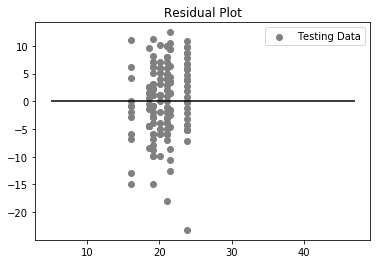

In [41]:
plt.scatter(y_pred1_dt_nbp,y_pred1_dt_nbp - y_test1_nbp, c="grey",label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test1_nbp.min(),xmax=y_test1_nbp.max())
plt.title("Residual Plot")
plt.show()

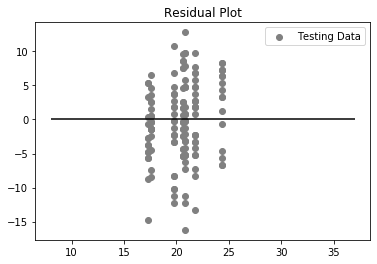

In [42]:
plt.scatter(y_pred2_dt_nbp,y_pred2_dt_nbp - y_test2_nbp, c="grey",label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test2_nbp.min(),xmax=y_test2_nbp.max())
plt.title("Residual Plot")
plt.show()

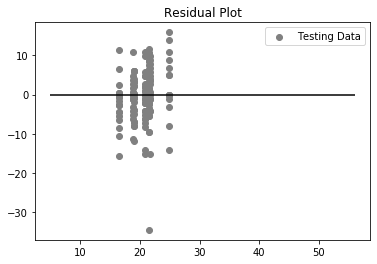

In [43]:
plt.scatter(y_pred3_dt_nbp,y_pred3_dt_nbp - y_test3_nbp, c="grey",label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test3_nbp.min(),xmax=y_test3_nbp.max())
plt.title("Residual Plot")
plt.show()